# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [ ]:
!curl --header "Host: storage.googleapis.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header "Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/4117/46665/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1601734371&Signature=X3uthFBLCeq%2F0jgE3WDR7uWk9OuFPR94ou4hJKlnqpeKwLxP3D6DSUPcvJEou8i%2FWAclelcFQMciT9nQ51YYe0z8G6lCU6hyr9778Q3VO8IJplCUSxbjCp6gpawPgMG7vnqtd8bl7Bh0yONBTCiIaVRufxjucVJ7Wk%2Fig1nP6IenusF9RPiRMbqg3ObEYwYlOmHYIhgHj7rhzBcp29J71MPf5TmoFhKs4K2GaWivkSWccsI4LdS6fSqr4GQWK1wQZmdKW0tTqDmeygO1LChKNhK5bf0AFQb6Zvu7V%2FIkxwQTT4cJ78eW6XMYYarCVr7dXZ8qo1evPp95ROIdFs7MkA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.7z" -L -o 'train.7z'

In [5]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pip install xgboost

In [15]:
#separating byte files and asm files 

source = 'train'
destination_1 = 'byteFiles'
destination_2 = 'asmFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        print(file)
        if (file.endswith("bytes")):
            shutil.move(source+'/'+file,destination_1)
        if (file.endswith("asm")):
            shutil.move(source+'/'+file,destination_2)

gQkYeuWndpbftU0L1rR7.asm
3E6cAGWj4YTUK8Zg59pH.asm
bSZgP3NGeYM4c65TjEWn.asm
jV8cSxM45pXgW7JPo6qt.bytes
JkzWI2MAvRi64g5QGUeF.asm
jZfoAgI4BUzQne1lY5hP.bytes
B5M1QJjfpUbcaG3kYX4m.bytes
ehGfVZy2QXtFzJkO1ESb.asm
0m94tRnhgpsAUuY1L8KC.bytes
fbVjmIlAQx0XsMihpKav.bytes
59voqhS867GYXDAMzmVj.bytes
cAPwa3zSIr7lvLVMpE2h.bytes
kSNnYl3ZLvB2WI7V4iEt.asm
CBZdlHELuV4rTPSb0sNM.asm
Cfpes01aH64iYxOBURuJ.asm
amO4HkjxM8KcdFBp0h5C.bytes
DZSwtHBVTqhivJscaoWA.asm
6WKJVBFk5INU2q7RLDhY.bytes
IERUhCfHvLA2ScutePwd.bytes
BV4EjiKZJ1ekaoYxz7D0.asm
4oukFyPdeRqwVKIQrc8C.bytes
dAN7DBVpI8Yh4snj0zoO.asm
fjAbOtkGQo9nRYiysBIP.bytes
8e5s4unL0TmKYSaycHCd.asm
GZ6Js1Ma8A2OXzqdlUxW.bytes
2hziOB94QdKyeqAXo8pM.asm
isftHEewmkrlK1pCPILd.bytes
9BrzKQYJWfIU7C2whoPT.bytes
15ADIikydX7eNq90WfcB.asm
H21YgbnrauQ8CdyXpDlW.asm
Fmgw4Qj1asTx0fS6Hvb2.bytes
Ei1t7BmK2Yh0db4QNXzL.asm
FLumNoC2IxqDP1HSj3zh.asm
ecjUHgzDC7ryXu2sNwJf.asm
aOwASN5yLgujBQ7hC8oi.bytes
gYcty9D6xrqwZ5ChJBQs.bytes
hUc3sa5YXmb2EoZ1pGrD.bytes
bhLUvK8TJqmG5A3lHaYo.asm
0J2pOclDKjad

gAdFOfVQUxbq738orWZC.bytes
JgoL72E0WlXhmFHD5cxp.bytes
EilXmdUb6zGBJWk9T2SO.asm
HVFvDT8ahset6nl4IAp0.bytes
0pqtVjvLk89PdYr5MwZO.bytes
EXmOvQTpUAPdG728hVy3.bytes
BMicWZAfDgb7k3p9Va5H.asm
2r0EQuyUfz1k9BhPgpvO.bytes
1F7jeznmCoiBxNdIKsWT.bytes
G31czXvpnwUfRtdJ4TFs.bytes
0ZNejapCUtVsq41x5FDm.bytes
k7Ie4EzhAbBjunGgy3fQ.bytes
cDRA2GdrqXYfoNaUMJg7.asm
friQmXP9g6D5AvOasLUT.asm
7ViTtBsPRgZQx1mqfHYO.asm
G1VDCsLj3X8FTW2yzgO0.asm
ieLs93AGTlXK6jBkQc2x.asm
AULFdkoH9Tl5GIBu1jwp.bytes
GgZ3AWheHi7BjuKDmF08.asm
9eMPNZm0jOhr1SLBDs46.bytes
2dqWPx6MhJZoY37vL1gT.asm
dro7GYJlVhXbT4D1SpCE.bytes
aWXfqViyPYSJHGwOeM07.bytes
8h0kicyswN7pzr2RJbOX.bytes
Bp2gVEzveRtOCrDGWxLI.asm
6bu0NZAsYoiUlCjEyH4X.bytes
juEShDrt6lY0wJCp9icX.asm
eWLUsnukJKYQ3dBCFZOT.bytes
JlhVH357f6XkT2EsP4DO.asm
8VlJEcmXepIy9RS3GMTq.asm
D4HgKrPeUyIlGFMv1tVR.asm
aRQCxG6dwKMrNZBgbzsY.asm
FawWOxhrVe4ysCXLkA8u.bytes
2b8y9vDX0GjJnC5qtcom.bytes
5mBNaMtbUno9cTkgieRu.bytes
IhFqSl92jfo3yw5Bzpg4.asm
aoeMjOFhtA5zDJl74Vv3.asm
3XHQbYcD2pI756SJknqB.bytes
KAGlH9fT

C1Dr4KzRJ2pN0jqG8lAI.bytes
az6odA7FxHkJY2LImbt0.asm
IKblhmuLHa31RjqGNiPy.bytes
ApyV7xXEzskeocfiNRbQ.bytes
jkHSGXpMO7iChRulZd5Y.asm
hRVBH2z6buFoNA7kZvS8.asm
GkfbZrRKmgFxq0Bypazh.bytes
fuNoryhBcxOlv3jaq2Ae.bytes
6nCl3JdMAkKjXOgoN8U4.bytes
1LE6uK9BdgNXIcSTnrMJ.asm
cqTRnE2K9ZGLglDdHbrv.asm
iQ0ZzWPnbqjaY4rEBGm8.bytes
gytj4UOV7FK8snBef35i.bytes
5bOucF2zs3YnAgZEp9BC.asm
6Jiw0HZgfQ8PvGCtsxDS.bytes
IwgDdxrbUkiXpfAMy6J1.bytes
25jQ4xItcnbB6Hfo0E9T.asm
GepfoxXH5VWKnhZzYl6U.asm
5QEDgGFSnVXWJLxUouBP.bytes
0M7aSiE9csDzkmfKheVt.bytes
4aY3eBDuOCmIMKQfbVgr.bytes
8dW2hOcgRfSTnapKVHwl.asm
CYktVyrlT8B3EODuSRQx.asm
d9Ojb8wkYFnaEDUoilxv.asm
jpzob9ECS6aLQDiYWTkV.bytes
6tvBurLRHc15EYh2mXba.bytes
EvshcHYmbpX7zD5raeQO.asm
dJ8r0BjtTKZMFQXn3Aub.asm
EAPboVp78v6st05Om3BL.bytes
hRKfPJTs2kzBviCADwuo.asm
iVXI84d0vYqOcLArnTtm.bytes
hwekzyp1YmGI3joFdLaP.bytes
0sdr2cfHLzNO9Ep4RSjT.bytes
5nSZXBYgVob1qf4avrDP.bytes
ibxGylBEOsMeP0cFQVhf.asm
iuy39zbPM8EZ4NIpOUTf.bytes
6qs0AxVC4GY2DJZyT9mN.asm
dgoqesyYhaOL7VkN3Zrj.bytes
84jKcb

DJjxUw8TfrevydRuCSZW.bytes
fQ9wWK0VkgxnmGlSRECe.asm
I908mGcdwzlf6oS3QOFT.asm
DYifKtF806I7JjkLHZgP.bytes
gLEW2nYOmSC9AjBvbuas.bytes
EjLnZ7ke8hyYIqxlJXD5.asm
buRJ9zQWwTilSgYckpCK.bytes
DUVqFkRTd3MnipSGWgbX.bytes
6WbENDkcC750euPGqApQ.asm
DpMNfemG3cCqxurE9BHj.asm
iRolW7mEntScOG1kw6bF.asm
7qgZAJlOevNdjHtbpfuR.bytes
cKmUqV7zyePDgYIt8i2O.bytes
6ZUjzliNqdfmES5WIgCs.bytes
23iLdjsJ6c01QNkrIRXD.asm
FiGCD4zX3Nrlo8QPsK6c.asm
C1IklXQF4DJiB8stvR39.bytes
ghXjl4pkWPETMiF1bruL.asm
FWurwNEfVxvT43HbLyid.bytes
c9fSauIX2i57AtLlhPvx.bytes
eI5Fqz379OSQaiRHpscX.asm
5HlDjF2dx8sJfcbeR6BW.bytes
G0xmghzaP9n2HUCNlKFZ.asm
gCQ70meuzrYAFaWDxZJv.bytes
CnPvMBc9sWK1jrbG4ILT.asm
HVz3swTcIpKidhADXJCk.bytes
EtTS3Gokxb49ghP8daVf.asm
20oPR6DZCFTuXi3tqhev.asm
gKvtaoZ7Lkl1V6yxq3Fc.asm
6XM2qzI9n1mZf0tu8Qlh.bytes
JlyfLgRt2pYs1cmZeHXE.asm
gbkKyeR2uhSO5GzsIr0T.bytes
g7vEfrR3s49CH8AVUeSu.asm
4rQn1u9Ygp2ZahEk8mM6.asm
Ga17B5qZe6VoM0kCxTAF.asm
FWdX4sHo6lDgZBzGKymf.bytes
9YUP4268XrNQmCpzdf0i.bytes
jelaIp5XS4JU7MzrmnoP.asm
6prXgmtMVs7BYv

CNMG4WYjkvLo35lbngdm.bytes
cmWUeA4FBR9laODHVhd2.asm
hdGzSti0HYqTLaZ4lrmv.asm
0fvnGU7dkbr8iEhZuMcP.bytes
ETKxsiMP3lQ4F6IfkCR7.bytes
EatOQHsRMXTLP8jYxu04.bytes
9A3aCDRujOMiWbzGTqfw.bytes
jzvoOgMqke9NpTJl2Hh0.bytes
Haxpwg4SmfWQLEPyZ5jK.bytes
6LOgJTo7YduN84r1vPk9.bytes
DEsoaSYpTiVrI2mCj9MF.asm
GBpWNc6frYvmq57wyxgX.asm
BAZxf3SiGRgNPl9wndqW.bytes
5CiGOStRIX3ayFUrAeoQ.asm
ajnhEXuNF4kJfOM7Sl36.asm
H7tCOwf5rzSluXiGsx8W.asm
j3tdbX6HDPxA7ZkBUpvG.asm
a0IC5NMWt9HkBdfOZ8nK.bytes
gPICkhiGxzB9fea5wUWM.bytes
gj9NIhpdqRb8UcnEeM6P.bytes
8lpNWeqHu4x5TgdkByha.asm
AejI1okyfNmhxn0vqgCT.bytes
K2OouiFyb1xSIVLRNfqE.asm
9Y2lyb1ocjBFCxJqQEZ3.asm
2mxzRY0nGXtkb45lDrqC.bytes
25r7AlY4VJojhNEcOW6x.asm
iLBjnX6IaCq2UG4Jc9pw.asm
fTNi8v1snWXwpdzQrBPy.bytes
Fr94kItvl5LyH1ASRX3o.bytes
3kXqmsjc6JxO0g8uQZWB.asm
92xGBknJqLXYFcgUmjVl.bytes
24NSkH5K03grqedBQM8T.asm
DlWyNoHdb1jAeGCOsaVU.asm
0W1RChtwZvj4Qy78GYUJ.asm
Ar3u7TDqkySJ4KjhWXge.asm
8h7B6Zm4wfJGAHv3RpFW.asm
fLUpvqmYE2OskXAB8jJW.asm
jo31Zp8ISmPxHkr5R9Vw.bytes
E3TBsHxCNg7OGU

8zMCrYOyB17UZ2jxWJQG.bytes
HWREIhidcbm5xuKqa9JX.asm
ASwCVlU7bIDm6HjuNOK1.asm
gA94Fpfcq5lRMvmkKXYJ.asm
Jrq5tba9sMkDvpe3EdXK.bytes
8Ek93sPoaJVSyhrKwXQe.asm
JMdwHZWNibQcFoSPG0sO.asm
gmKLiC1aN48zVTEcvbeY.bytes
7aYpinlyB6x4IMFRd1fh.asm
aiYVJXQbeFfxtZ3TGvH0.bytes
63lPuMWerDURdtXQEo5K.bytes
5QOWxyz7oqf9T6KIBDbk.bytes
Jy0NTuqFlpx6LnhIXWK4.asm
cI3dPqwaMLU0opfuNy6g.asm
6O8i5oRFAyhBQgZ9VKNw.asm
ji7FKGJZ3NTdnWe1OqCP.asm
gG23n7f1CLM6mZSrjIHb.asm
iugDTFftkUxZAWcBwCYI.asm
GfTjcoAWkO1IQDvXrgiU.asm
92xGBknJqLXYFcgUmjVl.asm
GQPk9p1ZEICdOTcxlH5W.bytes
D6C4HPXEmQVd7Y9esqv0.bytes
IrptWDXsmNchYlV9wGuy.bytes
6u25JYNBy8wzSHUjqxvh.bytes
fGL0FWUZNaCElQ8nIiJ3.bytes
BM80h5gaYevIJFyk7uPO.bytes
jmqLQWdavNxH84DrAoJT.asm
gaJ3ypIsYStVcNLFXRbM.bytes
0fxgjYEClPL1BDbcshzJ.bytes
2SnRYbpqifxILdT4Wg9m.bytes
ihbKdvnE3kJf0oTz8s9q.asm
5jYQm1xLpncJS2EsXBk4.bytes
7a5RVl9htyOJcBUK4rQm.asm
GeLtAwMsZIQoD0BNuhjr.asm
jyCUclPuFnL2Y8Z5meRg.asm
bNT4jk68t5lZghy3HPcr.bytes
HzGMQNh0jB814iA5DbYI.bytes
0RSW8EmilbznyYPIrgvD.bytes
3BX24l7nid8K

dJ326HRzYfn0DZIPhjMv.asm
67RMbxiLz1OgnVYSElPH.bytes
0pER9ak46CKVjPoqGLcD.asm
581bD2ouMmKpySGQszri.asm
IwgVeC9qRbUkfE6Q3HTh.asm
9bsFw0Dv6WQTyzGhenK5.asm
1NSfFQ28b0TDh5YGnLeR.asm
gFWLibev8VZR2pntMDUN.bytes
gDKZbIHe514u9pcEkFsV.asm
kD8OJCT6bsvcBU9IVaeA.asm
fZzkQNlXKvy7cVJ584hB.bytes
7qY2raQ6izp1KwGcsdyn.asm
Ewn8395kMeDfBKxXJQd4.bytes
JpcD0eAoxQPE2NVlLd4w.asm
BizuIl5W3K6fAoqSZnyX.asm
dAyK3ko0fD15PhLSsxc8.bytes
jtEkniTysxuqG6DhAX57.asm
0YWidX9hOD5sPrtTvc2M.asm
CoQn9bfkvMUjWwVgPAFL.asm
auFLPdo7bpcUKyqVxGIt.asm
HngN1QsVwobWqJB3RXCz.asm
JW5KOAExTVe2qH3kM4SD.asm
iQXbGho7apwfn4CKktAz.bytes
fzCQEVs80HT7ioJgYKFt.asm
k37eIpQ2ARSHZlYhnM0d.asm
e1UvAFY3h0J7n8MdL4EV.bytes
CT9nz5AgFyHGskIN8Oaj.bytes
gFNGYSsVAOx58JEI0laR.asm
1u3PmQiD0bX6RcgoCNKe.asm
JH9ls1UkVQ3qbX2tRFx6.bytes
esfmSy1PQMkGNbOBDxZR.bytes
6PG57gUmE2rLebCBTMno.bytes
Fbdqw108uxIcZ6rDMgmY.asm
8M5LqRFn3buTrYjSKfEU.bytes
2EcxbOXKTpYwm0MfkJUz.asm
4tXefqnpIW6LbYB5oNrH.bytes
ja7NE82XwHYceyg6o0vf.asm
8QaobvZKqje1lCnyrXwp.asm
Jt3kj7AHvPdRfL6yCh2n.byt

gTzsRE5r0qPBDLWXtOmx.asm
CywHbj2cUaVYgp9xhIDk.bytes
bSRakDIeOuFoq7NHQP3j.asm
7lz9eQuHKTdVIfGYMrUn.asm
hS8AvgErJHmtROy0iPdX.bytes
j9H8dMDniJ1ptlAr4xTL.asm
JxGT97ynUebwfFQZvdu6.asm
JIPoNu820rbAGE4zcqaT.asm
1AFY9HiVpuymkQOeoDMU.bytes
BKpbxgMPWUNZosdnO8Ak.asm
IVZFbMA91RSK36luQ4kW.bytes
bB4krWM7TCiOD06x2AN1.asm
CwaO90vYBFn32T4uRMDA.bytes
0YCvp8xd4rjiDMKFV9PA.bytes
ietZ2N7g30pfdSvn6OxI.bytes
0SUAyQWoTeZb8qmIPMK3.bytes
HvODZ7dlIkSCKzyP1pXR.asm
iCPn8QUoEZ14IHp3jSkM.asm
6nw2iAevTqXH1fsatcp7.asm
eG3621nPryiCxTS8LhUw.asm
GDtNoxZ3CKvYhcHQukrm.asm
0P6tEopzr2mIhkuOKiCD.asm
BNwV59DaCqRXs3LpTtAx.asm
dBuCJTrSQLaR8cmVjDlM.asm
FNkpTvc71Vo3R0UzSLeA.asm
JcaYWHPMxb4jSBLiXZNC.bytes
BYhZ8Rd2Nl7F69DtnMXH.bytes
8lTjbp3rnwtLh104E57v.bytes
IGWl2w5OhUjD4oxuA1H8.asm
B9A2JOzhTNjDWperRvgc.bytes
E4wCHstIQWNDe81Z9Okp.asm
IBdSglcK8jHfrDXhxbOU.bytes
hZfoeEcsTJRnNLlF5wG0.asm
Ad80bcoyGxVi15qg3Cwh.bytes
f4FGZxJb07UsA1LvYpew.asm
hmljZYQoVN82BXJOSEtz.asm
CF1ivEJDg47qMtxPWGUY.asm
HfclpJgDhXPiKA6IdQVw.asm
63lPuMWerDURdtXQEo5K.a

jHYOwUV8zrCoKBgXkG2l.bytes
FdiEeV3N8WtUSXjmcrxo.bytes
jFcM7da1kw3GCRBZnHrQ.bytes
hzH5vLburkG8simTIaeq.bytes
Jndgr04xmijEDKSUNtIW.asm
DFd42XkRm6PnZ9Q8SOy7.bytes
5wFNuSn6Gal8VXTAEimB.asm
1vQKJIkiBaTVxc5uYCZW.asm
ft5WBShKzCA80vTxlXEa.bytes
c3PhRtdH4SuDyLWNQXa6.asm
1gtbK8Nhsx3ICnoD9BXY.bytes
IkHEuqzV2fRptB3TnsoM.bytes
GRYhfsPiy72KcE8VaeqF.bytes
fN41R9SVgavu6tQ7lreY.bytes
8NTcV06HquOrdJzygYSF.asm
9vS2ZE3gVx1XwkcRioz7.asm
Jt3kj7AHvPdRfL6yCh2n.asm
2uPwGIAmqLodYFnNWBa0.bytes
974hJRWKfvXaTtNoqMGl.bytes
BRHGMC6IkeKx4LjfPJ1Y.asm
Adj52oSFhTbB837WEvpm.asm
9vS2ZE3gVx1XwkcRioz7.bytes
5o2LnyAK8Q7XxlOp9Muq.asm
fhTWnxRPbIcSqtzlOCoD.asm
G75QxhRIoP9Tg0KAvLUy.bytes
fDVkh4iq9LKx0owv5XrJ.asm
j6zenOwUWpPruio3Xk4b.bytes
bzDB7QwxH0eCMmnRSquL.bytes
giVwn8ERCZrvfSIGFmaK.bytes
18eZt9qWksQhoY3K60aE.asm
gdy9mWKhXCbOs2ltr60n.asm
54aPBqlUj7ODLT6bWRiy.bytes
9KBhpLPe6o13q0QHMjk4.asm
1iPIVbHFlw5Mcyn8D2Nu.asm
jM0aVyQfdqBhODSox1Ce.bytes
0x47zZTBynC21leohIEs.bytes
BC3It0Ak7YM9UQXVZnes.bytes
B7O90Mfiz5EPpJyTdXFb.asm
5fcdwygv

aeEpJKzLA9OhHB0QTbPN.bytes
jCXhwVO4ZdNqA9fHauDM.asm
3aUTHQpJqC8czb1yohmA.asm
Ewn8395kMeDfBKxXJQd4.asm
GpslYfT8v4PVtUNKrR0I.bytes
IWryLwtbuK13OsG04Tzl.asm
jC6QJ5RarVUNMAfpsnbw.bytes
8LFCXHZ2TMdNhc7aUAGf.bytes
GcDqJZKaY7OdRAkm4o95.bytes
IFs5zKLkOMqNtubS69XB.asm
F2ClVtNKYrxp1QsEwGab.asm
aj8xLYWXwT6Olgo31ndJ.bytes
4Z5WMOr1NqCw2y6tfnlb.asm
DWnB8cNMprEmkXTtHu9O.asm
49epoGtYixcgnkfwJ2dv.asm
IbEo9xn38UJfk6R72XYq.asm
84ViQ93gyPruDSoOn7zw.bytes
jHfu9AMl1GkNWch0Yv53.bytes
kivFX8Jh129u4mbgysLe.bytes
du6hbLIPwW2aGYZkNRQV.bytes
chVqtrzIORSJkCwu2KfQ.bytes
G1VDCsLj3X8FTW2yzgO0.bytes
4DYgWsnfa3t0zUXAVrPw.asm
gYnkoJDBsUPtj8N2ea6R.asm
84RrvZ0uc7kqOhsSDITN.asm
deTXH9Zau7qmM0yfYsRS.bytes
gpQPsBn4Hc6uoxmFbYU3.bytes
GZMUBgvzt3brcfsh84iR.bytes
Htw4uoGKsN37Dne5ivEP.asm
8I5jZWSKhlV2k9HqpOuB.bytes
KSWPydxjJAYn08HOcM5a.asm
EYrRoIbOfeVDdQF3Si9L.asm
7MQb5VEYLiSBPt1GZgeJ.bytes
IyVlH08cxfzMLvjFbrOX.asm
279EOCqmnPGMfixzTuwJ.bytes
CRrAOvzk452LVZIGMWsq.bytes
Gmk6HR4iIWJDEubOU3xe.asm
3NPVdenAHU8cyZlsQBv1.asm
6XBvjdoIDrAh

H4lKrjuZUTVAsgiz7kFS.asm
d0QN7fJslMFL6qkKgbWS.bytes
3YCBS2N5ypQ94Um1Mhdt.asm
bRyv98nLOI2mNDlp5xK6.bytes
Iun9V7fQK2lXDS48MwtY.bytes
db7pXDtBiKLxP3J2WuEk.bytes
5a2Ivxte8k3uBCrUEwNq.bytes
80gSqucmDeUFbHJWYy7M.asm
ATr6NemOyI2KF0w48BR5.bytes
EhHWtoiAX4kZp3s7wVUc.bytes
4SuwT5vFQc1YN70iegLx.asm
0hZEqJ5eMVjU21HAG7Ii.bytes
dmrZGyScpfTCRzUW8a5V.asm
2dqWPx6MhJZoY37vL1gT.bytes
JGqMAsU8BNzPpT1cIF2n.asm
dLbutyFNmW7nfhUiE4cr.bytes
gdCHhcYzBskGJXZ63rol.asm
jwOH9vMbCimpZGrQdYPq.asm
grm1u5UkAvVC8obIKqi7.bytes
5RbwG9tBMSfTLscmYVJl.asm
5PsZU2Cf0jRbcvOtaDAg.bytes
bkvWjpGYrfKLJUyON74g.bytes
3iZUOaXjKV0Dpmyrt2k5.bytes
5fEXZxI1vBO8nbFdS2Mi.bytes
aitshTGMD1EnVb8oAIzf.bytes
JoKe87uDxvVPjcXlWOLE.bytes
kDj1KVgGfTIFWPX9idoc.asm
bWItl0m5QhvFgDCsrBHe.bytes
AocU28V01uDMpbavxJmQ.bytes
AithdqZTbgGjRulO3Lz6.asm
1cgZSaQIy6UBTAqsdX9V.asm
15ADIikydX7eNq90WfcB.bytes
H4mO5vLkBgUd1eFixXoS.asm
9akYgqNApZW32UB1VIrL.asm
6SpFHDUdJql8rbcZ0YIv.asm
COntTlwPvaG3p4hMSJqI.bytes
80ViwbE3MzP2elI7NSFZ.bytes
7edjQGTXowvNgS9uVi5J.asm
DvdM5Z

1cB6EdrmebFjAX3QHkS9.asm
3VrMnozUtP519ThSG4iy.bytes
eS8lzGXw3KYrBUnhm65a.bytes
JnOV89xWwmhI4HR0XL7o.bytes
8fgzBbsoHXwJ6UvDhmL4.bytes
jXq7Kt2dOeIHo1AS4sxP.asm
IpNGJ84WE1kguZ0tKAPn.asm
8hkxUfgW2bHMqPjrcNLT.asm
dw4J9DBiagtKMGo25N3E.bytes
7PtaAnTZi0QCphfNy6ms.asm
K1cOhi76tkCvbNxPfLmD.asm
dEabFQq0yznt5eID378R.asm
fXPaL8v6bgNqRIcn1BZO.asm
5Su9y2pdWjXihsICkxUF.bytes
75qSAohLWYb60Hs24NUF.asm
h0RSAT7iEZH4lOQv3NtW.bytes
GepfoxXH5VWKnhZzYl6U.bytes
hRVBH2z6buFoNA7kZvS8.bytes
01SuzwMJEIXsK7A8dQbl.bytes
j0OzVHxosPXhY4BZ1FQ5.asm
BXrPSmlKvMJz1guqHFLa.bytes
90bDVByGTFolh5XW1JiU.bytes
8hPsWwjKD51Z7BtmLNx4.bytes
G3td1uFSQnHxrZ9jPE4X.asm
Iq568cLUZv7RVxy2dr0f.bytes
5aPrNQ0qMBRUGJSImKEc.bytes
GjJRLwAZuYEroCO1TQVa.bytes
7HYhXpwdBAxL6cGn3Ov0.asm
HCaGgWTI2fY0qNdZzeVF.bytes
JVxhvaMDsj4PYBelFwOu.bytes
fwMvl83WJ5KB01UN4ckC.asm
HkL72qMuOcp0T3gWahnN.asm
hlz7aimR9U8PWVqSvKgF.asm
2nr0GTSxN4zKobZqwpy6.asm
cZD3lEa9HQfnUx0BzCRb.bytes
dVDRPJcvx0lhzqHUtFKr.bytes
ATfrBeFJV9U2NDdCmEcZ.bytes
86kMhQHlXa1UWO3ifeg2.bytes
9hXMru

DPVTHpkfLrABWaqgoyjw.bytes
iWHoYVvyGgmCQ4NEzRU3.bytes
JDC9zOMvfUxWby4HVFk3.asm
0tNShPVGYWjcmT2yXLdq.asm
0RlWbvBk9rEtVZ74KAen.asm
5fMDqaRKQBd3AhVPFIkZ.asm
cwMuz2CjEtOdNiA5h3ya.bytes
dHsIFJomVwubBQYCp0K4.bytes
fDJXgvz2cAtPopmIO0hi.asm
iTaQmnKNdO3c5xfPLZYw.bytes
aPU2SW8Kt5OfDzXZ3YqC.bytes
7fTL1lUKHqa9rXYuzxgZ.bytes
I2LpvgJMuBOXGjYyHeV9.asm
79RN6Du2CAiqaOpStbJB.bytes
eUfHduyMrs3pJKW0imDo.asm
53cwdgavTtGukRl19jM0.asm
EY4FNVtgO8Q75rCvcIl9.bytes
FmafvwYsu6Xn510GgU4c.bytes
HqFd1seJ8IURTuwDbW90.asm
Ik710wQjPu86SnEpXNKv.asm
GSQeltaBqZPDTpHEoxW7.asm
6prXgmtMVs7BYvPL3ce5.asm
3jRZMsoI9VmuhTGnUrQi.asm
8ovZYfGnP2Htekc7gizT.bytes
CH8Yj5Nhz0oVkTc9mSJe.bytes
02IOCvYEy8mjiuAQHax3.bytes
iMoflC6sreq7YZ3B2P0b.asm
h7eLbvRPOmF8GWnSV0td.bytes
CPELmM8GYegcxRIQH4VA.asm
EmcRqS2xpAOXlBfyuDUi.bytes
9tTYNv3RiWEKkqw1Ppf2.asm
JgBfH0iAzTC5L2jIcnmb.bytes
cXzKusRWYMq4iA91Cx8k.asm
4ng9zuri2Dtm5H8INwxF.asm
280npuOwNHdxPDVmAyLT.bytes
BEcVolryIXTuDYLKbgGj.asm
egLap5DYlIPH1FvB69Gi.bytes
9nvIAP8UiY2GxMe5ptSJ.asm
iz2hCIvZncJ9jD

czBpmyW2hKAiGLDbv0Uq.bytes
05LHG8fR3iPn6agIo9z7.asm
0IMUKlZs1Sm8LpGRkWhT.bytes
Ee9al8AhjSKcZzxyRDw3.asm
Ewlc6ehLbWF0VgJdOfs2.asm
jqNt0mQMAOPZDHWxc6sY.bytes
gL7OxhdQVZSXPsGAzm46.bytes
bkyRaZK7X1lNBeWmDJGV.bytes
ALu75tZPozYRQnW6GBhT.asm
figPlLtepGyVmDwXExc6.bytes
0ASH2csN7k8jZyoRaqtn.bytes
EgBSwQp9j7FO2cZnehvm.bytes
eBST0wXfIAqj86r9VY5b.bytes
Hart39NkLlB6RAbq5w7Q.bytes
8LiHPj7EOaFpnN0uTAW9.asm
gRJ3rY0TIc98NP1fbxXh.bytes
iWXubQ6nP23yTYH4lJxk.asm
2XL3TUHZNYkuvS0n5KpC.bytes
amGeXDTwCldUsVBHPqkr.bytes
CpeIDYlmhsART4Oc7gqz.bytes
4wmslOCgr1HfavRdSZ6q.bytes
DYX2E3otnwLK1cIebNuJ.bytes
784QCIkhOnwcRvFeNDZr.bytes
C70ihKqv4Ll6GDQSrk1J.bytes
dEPvlBkpJb9sWIDfAaLC.asm
DZvJ1nBiqaL34YSwo8k0.bytes
EcurA2WMeGk5Tv9V4LHl.bytes
9lHv4AnrzgeWNGcCsEfa.bytes
0sYDNzwVMaWE2TIZeA81.bytes
iWd5sag08IpDQFHkBv1t.bytes
3UGJfgV58TXmWAnh64De.bytes
aKH9GvftsjAQzeUwi0bL.asm
JRgoPbLy2GVQzsUdKmkj.asm
JoU0zHnMXLS3pRCxbFaY.asm
9NPX21MLDFoAHh3ZwuGm.asm
GTXj5Lg2ZF4tJAsPBCYc.asm
24YOX6UIvdmf0CD9PS1H.bytes
Gbs4cQpR5JWdFhBIVKHl.byte

In [21]:
os.makedirs("asmFiles_3000")
for i , file in enumerate(os.listdir('asmFiles')):
    if i == 2000:
        break
    shutil.move('asmFiles/' + file ,"asmFiles_3000")

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


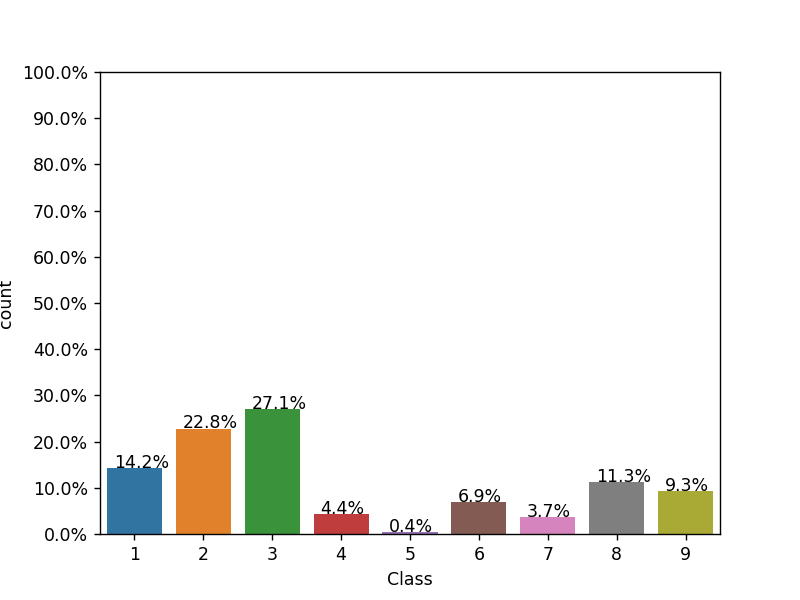

In [16]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [17]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID       size  Class
0  jV8cSxM45pXgW7JPo6qt   0.764648      4
1  jZfoAgI4BUzQne1lY5hP   4.630371      9
2  B5M1QJjfpUbcaG3kYX4m  10.804199      3
3  0m94tRnhgpsAUuY1L8KC   8.099609      3
4  fbVjmIlAQx0XsMihpKav   8.099609      3


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


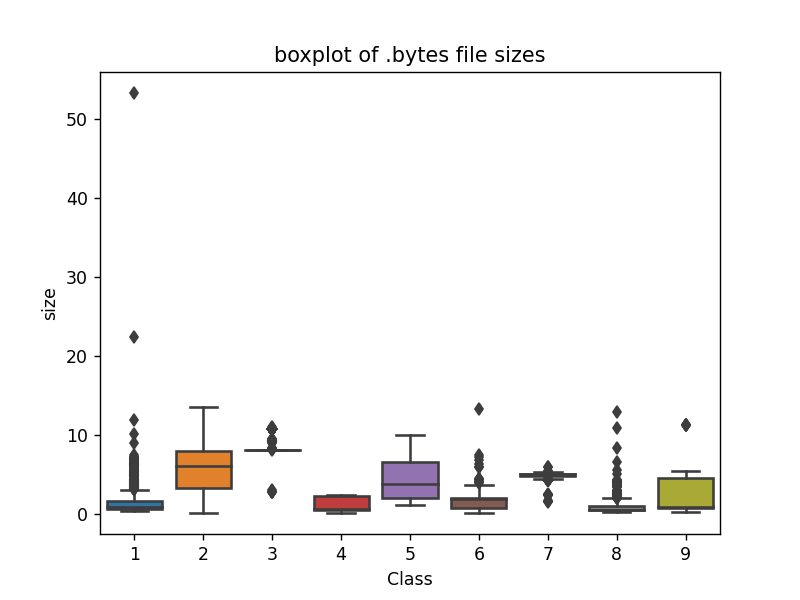

In [18]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [ ]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
byte_feature_file.write("\n")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i, row in enumerate(feature_matrix[k]):
        if i!=len(feature_matrix[k])-1:
            byte_feature_file.write(str(row)+",")
        else:
            byte_feature_file.write(str(row))
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [19]:
byte_features=pd.read_csv("result.csv")
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff    ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753  1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902  8588  

[2 rows x 258 columns]

In [20]:
data_size_byte.head(2)

ID      size  Class
0  jV8cSxM45pXgW7JPo6qt  0.764648      4
1  jZfoAgI4BUzQne1lY5hP  4.630371      9

In [21]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f9    fa    fb    fc    fd     fe     ff    ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753  1824  5.012695   
1  9291  ...   439   281   302  7639   518  17001  54902  8588  6.556152   

   Class  
0      9  
1      2  

[2 rows x 260 columns]

In [22]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(byte_features_with_size)

In [23]:
result.head(2)

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   

          5         6         7         8  ...       f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.01356  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.00192  0.001147  0.001329   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  

[2 rows x 260 columns]

In [24]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

<h3>3.2.4 Multivariate Analysis </h3>

In [ ]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [25]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [26]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


In [ ]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()
cv_class_distribution = y_cv.value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [61]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

In [ ]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [ ]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

In [ ]:
print (random_cfl1.best_params_)

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [ ]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
#ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'thrid')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [ ]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [27]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [28]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  gQkYeuWndpbftU0L1rR7  35.841395      1
1  3E6cAGWj4YTUK8Zg59pH   0.169923      3
2  bSZgP3NGeYM4c65TjEWn  17.790498      2
3  JkzWI2MAvRi64g5QGUeF   0.195534      3
4  ehGfVZy2QXtFzJkO1ESb  85.350543      2


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


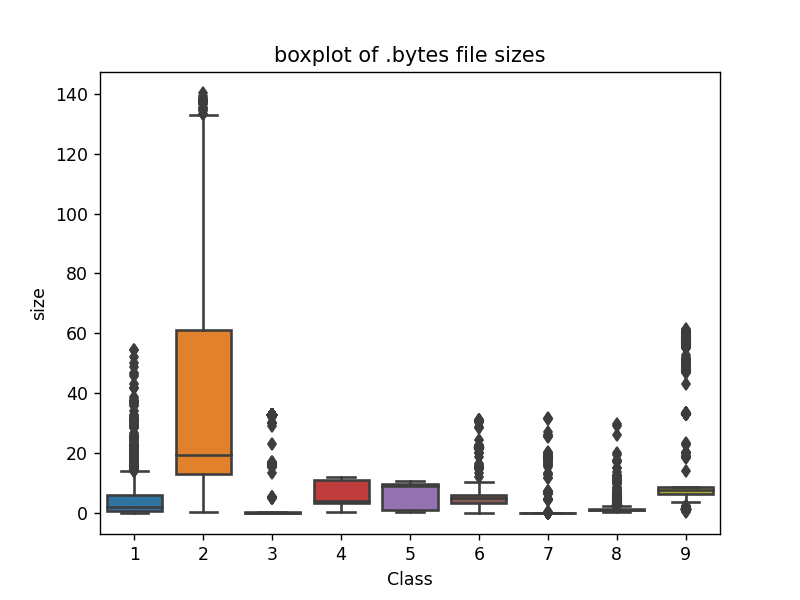

In [29]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [30]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [31]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


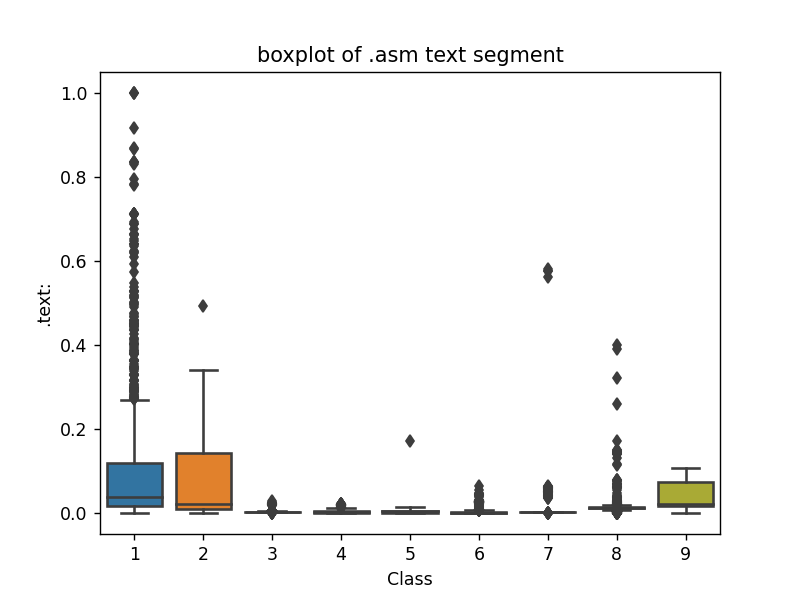

In [32]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


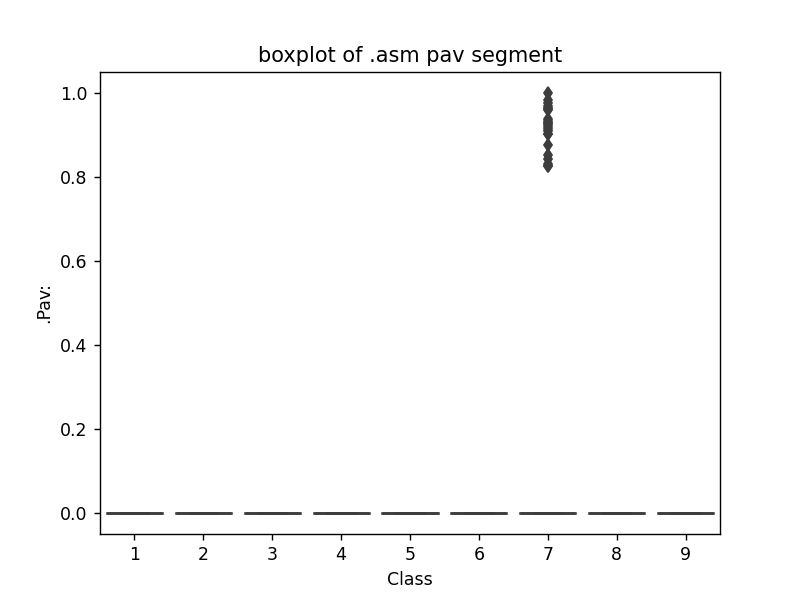

In [33]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


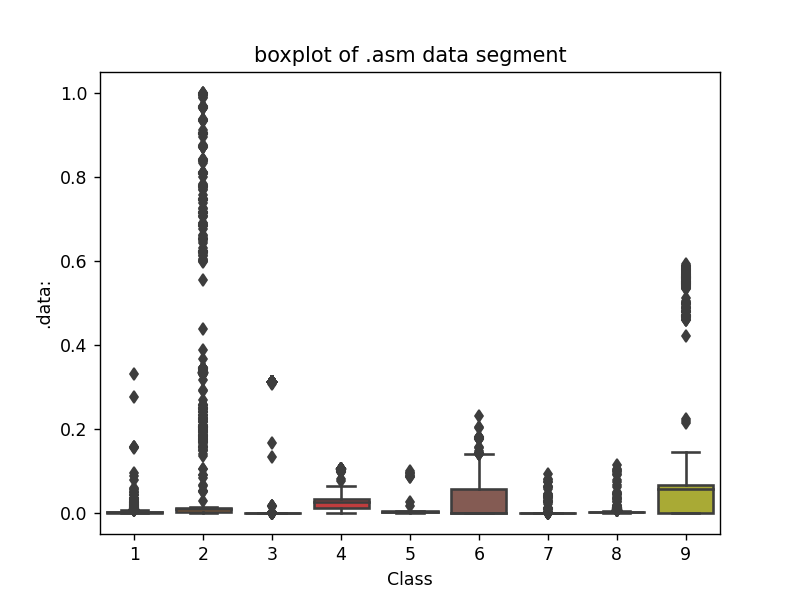

In [34]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


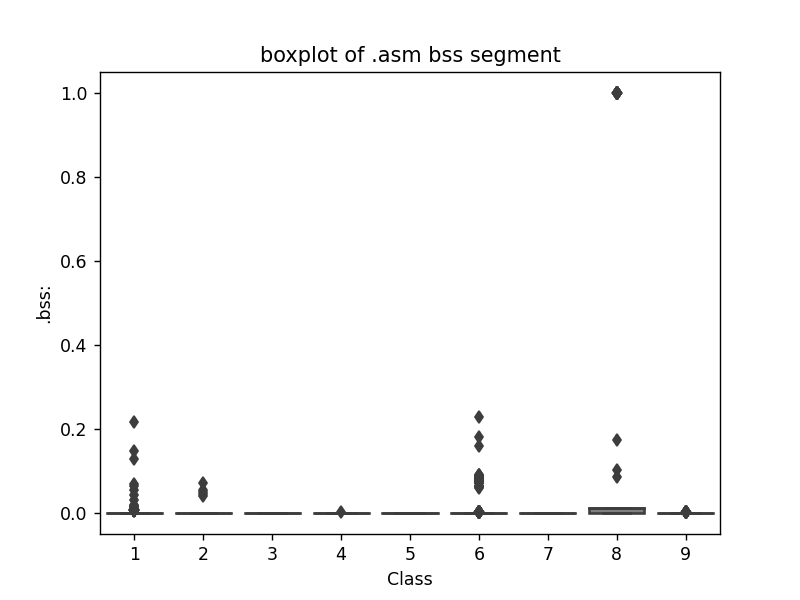

In [35]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


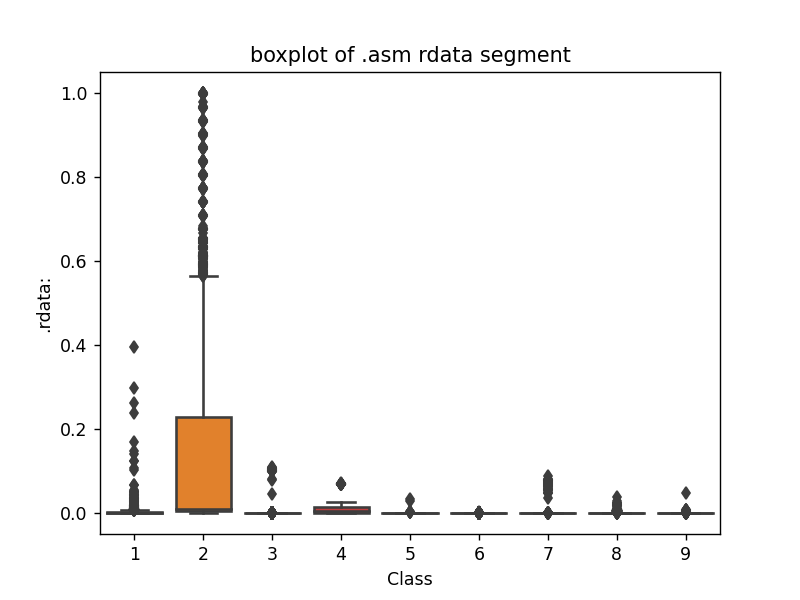

In [36]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


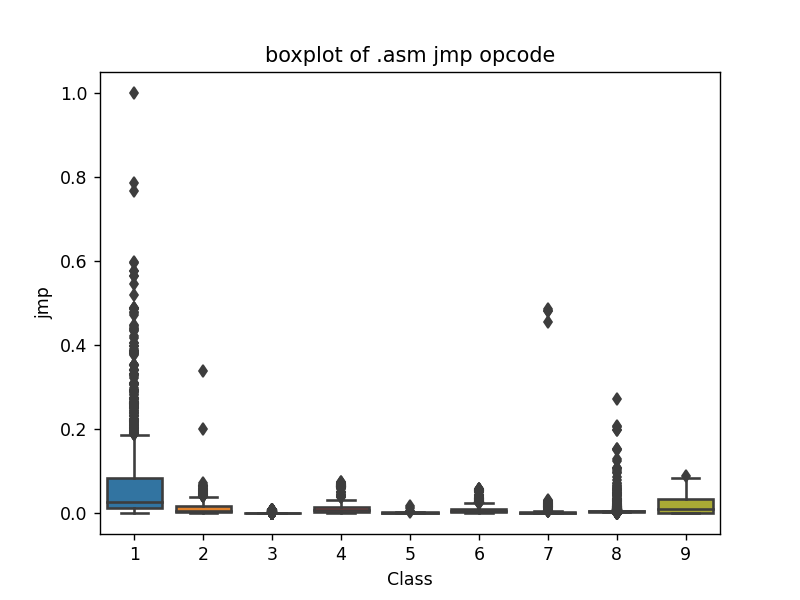

In [37]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


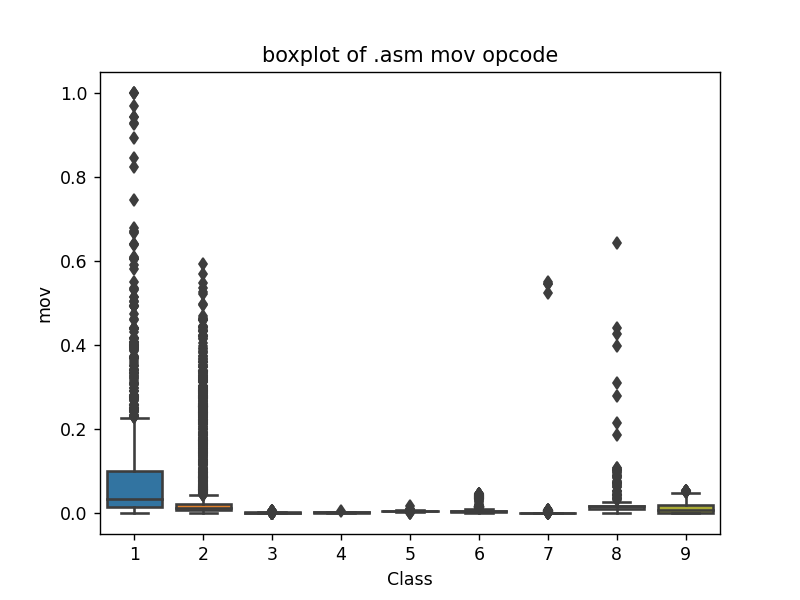

In [38]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


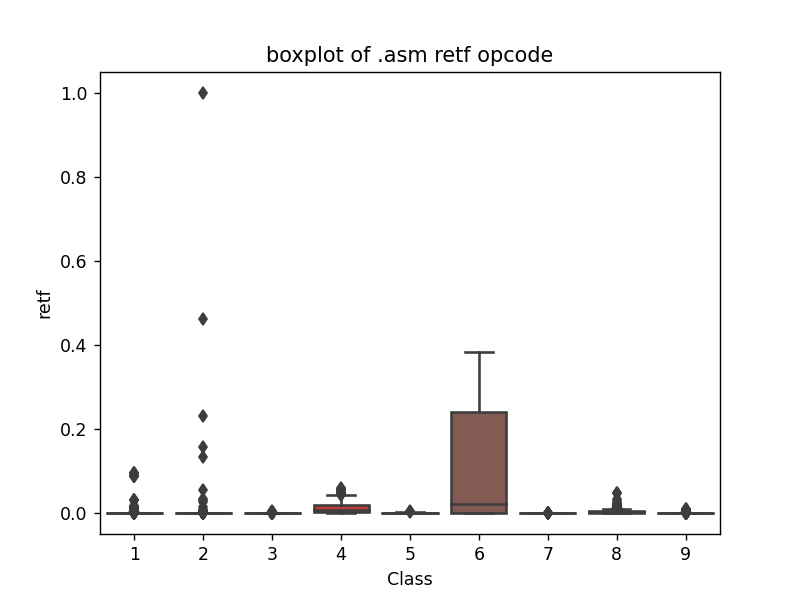

In [39]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


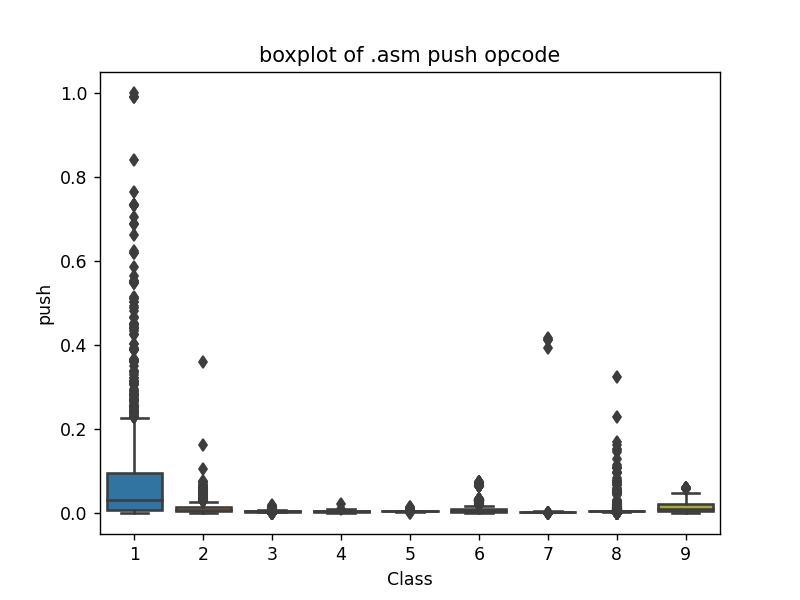

In [40]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

In [ ]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [41]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [42]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [43]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

In [ ]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

In [ ]:
print (random_cfl.best_params_)

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [44]:
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

In [ ]:
result_asm.head()

In [45]:
print(result.shape)
print(result_asm.shape)

(10868, 260)
(10868, 54)


In [52]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...       edx       esi       eax       ebx  \
0  0.002946  0.002638  0.003531  ...  0.015418  0.025875  0.025744  0.004910   
1  0.006984  0.008267  0.000394  ...  0.004961  0.012316  0.007858  0.007570   
2  0.002155  0.008104  0.002707  ...  0.000095  0.006181  0.000100  0.003773   
3  0.000481  0.000959  0.000521  ...  0.000343  0.000746  0.000301  0.000360   
4  0.000229  0.000376  0.000246  ...  0.000343  0.013875  0.000482  0.012932   

        ecx  edi       ebp       esp       eip    size_y  
0  0.008930  0.0  0.027174  0.000428  0.049896  0.400910  
1  0.005350  0.0  0.043478  0.000673  0.024839  0.099719  
2  0.000713  0.0  0.048913  0.000000  0.012802  0.060553  
3  0.001057  0.0  0.030797  0.001468  0.003173  0.000432  
4  0.001363  0.0  0.027174  0.000000  0.008316  0.006983  

[5 rows x 307 columns]

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

In [ ]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x, axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [47]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

In [ ]:
print (random_cfl.best_params_)

In [ ]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.15,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

<h1> 5. Assignments </h1>

<ol>
<li> Add bi-grams on byte files and improve the log-loss</li>
<li> Watch the video (<a href='https://www.youtube.com/watch?v=VLQTRlLGz5Y#t=13m11s'>video</a>) and include pixel intensity features to improve the logloss </li>
</ol>

<pre>
1. you need to donwload the train from kaggle, which is of size ~17GB, after extracting it will occupy ~128GB data your dirve

2. if you are having computation power limitations, you can try using google colab, with GPU option enabled (you can search for how to enable GPU in colab) or you can work with the Google Cloud, check this tutorials by one of our student: https://www.youtube.com/channel/UCRH_z-oM0LROvHPe_KYR4Wg (we suggest you to use GCP over Colab)

3. To Extract the .7z file in google cloud, once after you upload the file into server, in your ipython notebook create a new cell and write thess commands
  a. !sudo apt-get install p7zip
  b. !7z x file_name.7z -o path/where/you/want/to/extract
  
https://askubuntu.com/a/341637
</pre>

In [3]:
result_x = pd.read_csv("result_with_size.csv")
result_x

Unnamed: 0                    ID       0     1     2     3     4     5  \
0               0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242   
1               1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844   
2               2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330   
3               3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   
4               4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   
...           ...                   ...     ...   ...   ...   ...   ...   ...   
10863       10863  loIP1tiwELF9YNZQjSUO    5268  1177  1072  1222  1238  1159   
10864       10864  LOP6HaJKXpkic5dyuVnT    3032   298   248   293   274   213   
10865       10865  LOqA6FX02GWguYrI1Zbe    5671   221   270   323   313   155   
10866       10866  LoWgaidpb2IUM5ACcSGO    3637   437   453   506   511   390   
10867       10867  lS0IVqXeJrN6Dzi9Pap1    3534   373   385   432   495   399   

          6     7  ...    f9    fa    fb    fc    fd     fe     ff      ??  \
0      3650  3201  ...  3101  3211  3097  2758  3099   2759   5753    1824   
1      8420  7589  ...   439   281   302  7639   518  17001  54902    8588   
2      9007  2342  ...  2242  2885  2863  2471  2786   2680  49144     468   
3       550   523  ...   485   462   516  1133   471    761   7998   13940   
4       262   249  ...   350   209   239   653   221    242   2199    9008   
...     ...   ...  ...   ...   ...   ...   ...   ...    ...    ...     ...   
10863  1143  1126  ...  1094  1154  1088  1113  1114   1107   1178  347816   
10864   203   222  ...   202   202   215   208   195    196    336   14368   
10865   248   147  ...   159   247   163   249   149    226    231   11396   
10866   431   407  ...   377   376   352   543   361    330    440   85540   
10867   393   373  ...   376   328   338   479   337    350    392   78872   

           size  Class  
0      5.012695      9  
1      6.556152      2  
2      4.602051      9  
3      0.679688      1  
4      0.438965      8  
...         ...    ...  
10863  2.223145      4  
10864  0.254883      4  
10865  0.254883      4  
10866  0.651367      4  
10867  0.594727      4  

[10868 rows x 261 columns]

# Deducting all the features to the size of 2000 Samples



In [5]:
result_y = result_x["Class"]
result_y = result_y.loc[:1999]
result_x = result_x.loc[:1999]

print("Shape X",result_x.shape)
print("Shape Y",result_y.shape)

Shape X (2000, 261)
Shape Y (2000,)


# Calculating Byte Features


In [2]:
byte_vocab = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"

In [3]:
byte_bigram_vocab = []
def byte_bigram():    
    for i, v in enumerate(byte_vocab.split(',')):
        for j in range(0, len(byte_vocab.split(','))):
            byte_bigram_vocab.append(v + ' ' +byte_vocab.split(',')[j])
    return byte_bigram_vocab

In [4]:
byte_bigram_vocab = byte_bigram()
len(byte_bigram_vocab)

66049

In [7]:
len(byte_file_list)

10868

In [6]:
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer
import scipy

In [9]:
#Testing

vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=byte_bigram_vocab)
file = "01azqd4InC7m9JpocGv5.bytes"
f = open('byteFiles/' + file) 
row = (vector.fit_transform([f.read().replace('\n', ' ').lower()]).toarray())
bi_gram_df = pd.DataFrame(columns = byte_bigram_vocab)
#row = (vector.fit_transform([f.read().replace('\n', ' ').lower()]).toarray()[0])
#bi_gram_df = bi_gram_df.append( pd.Series(row) , ignore_index=True)
#scipy.sparse.csr_matrix(bi_gram_df.values)
#scipy.sparse.save_npz('bi_gram_df.npz', scipy.sparse.csr_matrix(bi_gram_df.values))
#bi_gram_df.loc[0] = row[0]
#bi_gram_df.fillna(0, inplace=True)
#scipy.sparse.csr_matrix(bi_gram_df.values)
bi_gram_df

Empty DataFrame
Columns: [00 00, 00 01, 00 02, 00 03, 00 04, 00 05, 00 06, 00 07, 00 08, 00 09, 00 0a, 00 0b, 00 0c, 00 0d, 00 0e, 00 0f, 00 10, 00 11, 00 12, 00 13, 00 14, 00 15, 00 16, 00 17, 00 18, 00 19, 00 1a, 00 1b, 00 1c, 00 1d, 00 1e, 00 1f, 00 20, 00 21, 00 22, 00 23, 00 24, 00 25, 00 26, 00 27, 00 28, 00 29, 00 2a, 00 2b, 00 2c, 00 2d, 00 2e, 00 2f, 00 30, 00 31, 00 32, 00 33, 00 34, 00 35, 00 36, 00 37, 00 38, 00 39, 00 3a, 00 3b, 00 3c, 00 3d, 00 3e, 00 3f, 00 40, 00 41, 00 42, 00 43, 00 44, 00 45, 00 46, 00 47, 00 48, 00 49, 00 4a, 00 4b, 00 4c, 00 4d, 00 4e, 00 4f, 00 50, 00 51, 00 52, 00 53, 00 54, 00 55, 00 56, 00 57, 00 58, 00 59, 00 5a, 00 5b, 00 5c, 00 5d, 00 5e, 00 5f, 00 60, 00 61, 00 62, 00 63, ...]
Index: []

[0 rows x 66049 columns]

In [10]:
#Reference for Bigram : https://kavita-ganesan.com/how-to-use-countvectorizer/#.X3GEVWgzZP
vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=byte_bigram_vocab)
bi_gram_df = pd.DataFrame(columns = byte_bigram_vocab)
for i, file in tqdm(enumerate(os.listdir('byteFiles'))):
    f = open('byteFiles/' + file)
    row = vector.fit_transform([f.read().replace('\n', ' ').lower()]).toarray()[0]
    #df_marks = df_marks.append(new_row, ignore_index=True)
    bi_gram_df.loc[i] = list(row)
    if(bi_gram_df.shape[0] == 2000):
        break
    f.close()

bi_gram_df.fillna(0, inplace=True)
scipy.sparse.save_npz('bi_gram_df.npz', scipy.sparse.csr_matrix(bi_gram_df.values))

1999it [1:09:36,  2.09s/it]


In [7]:
from sklearn.preprocessing import normalize
bi_gram_df = scipy.sparse.load_npz('bi_gram_df.npz')

In [8]:
from sklearn.preprocessing import normalize
byte_bigram_vect = normalize(scipy.sparse.load_npz('bi_gram_df.npz'), axis = 0)
byte_bigram_vect

<2000x66049 sparse matrix of type '<class 'numpy.float64'>'
	with 91027651 stored elements in Compressed Sparse Column format>

# Extracting Important Features For Byte_bi_gram

In [9]:
def imp_features(data, features, keep):
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    rf.fit(data, result_y)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    imp_value = np.take(rf.feature_importances_, imp_feature_indx[:20])
    imp_feature_name = np.take(features, imp_feature_indx[:20])
    sns.set()
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(x = imp_feature_name, y = imp_value)
    ax.set_xticklabels(labels = imp_feature_name, rotation = 45)
    sns.set_palette(reversed(sns.color_palette("husl", 10)), 10)
    plt.title('Important Features')
    plt.xlabel('Feature Names')
    plt.ylabel('Importance')
    return imp_feature_name[:keep]

In [63]:
byte_bi_indxes = imp_features(byte_bigram_vect, byte_bigram_vocab, 300)

byte_bi_indxes

array(['52 e8', 'c0 b7', '57 57', 'fb f7', '80 ff', '00 b8', '00 f6',
       'c2 10', '57 77', 'fe ff', '61 72', 'c3 ff', '6c 69', '7d 08',
       '65 41', '48 11', '9d 74', '17 17', '74 00', '50 ff'], dtype='<U5')

In [72]:
bi_gram_df = pd.DataFrame(byte_bigram_vect.toarray(), columns = byte_bigram_vocab)
bi_gram_df = bi_gram_df[list(byte_bi_indxes)]

bi_gram_df.head()

52 e8     c0 b7     57 57     fb f7     80 ff     00 b8     00 f6  \
0  0.003062  0.001927  0.000000  0.000207  0.000219  0.000257  0.000045   
1  0.019140  0.038536  0.000154  0.001450  0.022956  0.007776  0.001485   
2  0.007401  0.034682  0.000445  0.007042  0.013555  0.001735  0.000487   
3  0.004338  0.011561  0.000137  0.003521  0.001312  0.000707  0.000136   
4  0.005870  0.026975  0.000222  0.001864  0.007652  0.000964  0.000193   

      c2 10     57 77     fe ff     61 72     c3 ff     6c 69     7d 08  \
0  0.000000  0.000000  0.000203  0.002184  0.000558  0.001208  0.000140   
1  0.000862  0.000634  0.013307  0.003120  0.026212  0.006646  0.003227   
2  0.002068  0.004059  0.001424  0.008735  0.009481  0.016918  0.003367   
3  0.001034  0.001649  0.000529  0.006239  0.004462  0.004834  0.001543   
4  0.000689  0.001522  0.000692  0.005615  0.006692  0.010272  0.001122   

      65 41     48 11     9d 74     17 17     74 00     50 ff  
0  0.002285  0.000130  0.003286  0.000014  0.000152  0.000051  
1  0.002285  0.000391  0.065710  0.000070  0.037574  0.030440  
2  0.034279  0.002085  0.029570  0.000363  0.000758  0.002275  
3  0.012569  0.001173  0.019713  0.000167  0.000947  0.000607  
4  0.021710  0.001694  0.022999  0.000209  0.000871  0.002174

# Saving and Concatenating the Byte bigram features for 2000 data set.

In [10]:
#bi_gram_df.to_csv("bi_gram_df_final.csv")
bi_gram_df = pd.read_csv("bi_gram_df_final.csv")

In [11]:
result_x = pd.concat([result_x,bi_gram_df], axis = 1, join = 'inner')
result_x.columns

Index(['Unnamed: 0', 'ID', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '61 72', 'c3 ff', '6c 69', '7d 08', '65 41', '48 11', '9d 74', '17 17',
       '74 00', '50 ff'],
      dtype='object', length=282)

# ASM Features.(Taking 800 pixels)

In [12]:
import array

In [83]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [22]:
#Reference1:https://github.com/dchad/malware-detection/tree/master/mmcc
#Reference2:http://imageio.github.io/
from tqdm import tqdm
import imageio
def collect_img_asm():
    for i , asmfile in tqdm(enumerate(os.listdir("asmFiles_3000"))):
        filename = asmfile.split('.')[0]
        file = codecs.open("asmFiles_3000/" + asmfile, 'rb')
        filelen = os.path.getsize("asmFiles_3000/" + asmfile)
        width = int(filelen ** 0.5)
        rem = int(filelen / width)
        arr = array.array('B')
        arr.frombytes(file.read())
        file.close()
        reshaped = np.reshape(arr[:width * width], (width, width))
        reshaped = np.uint8(reshaped)
        os.remove("asmFiles_3000/" + asmfile)
        imageio.imwrite('asmFiles_3000/' + filename + '.png',reshaped)

In [23]:
collect_img_asm()

2000it [37:50,  1.14s/it]


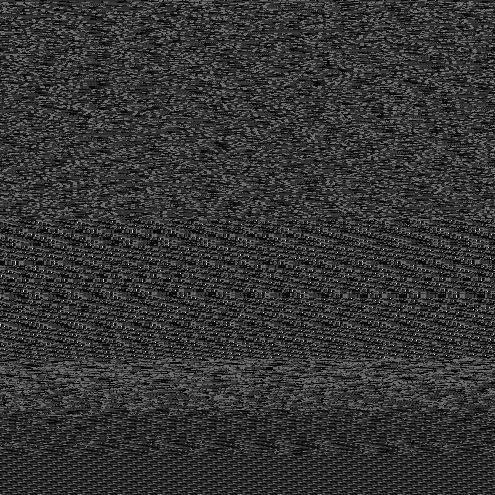

In [24]:
from IPython.display import Image 
Image(filename='asmFiles_3000/deTXH9Zau7qmM0yfYsRS.png')

# Taking 800 pixels.

In [26]:
from tqdm import tqdm
import cv2
imagefeatures = np.zeros((2000, 800))

for i, asmfile in tqdm(enumerate(os.listdir("asmFiles_3000"))):
    img = cv2.imread("asmFiles_3000/" + asmfile)
    img_arr = img.flatten()[:800]
    imagefeatures[i, :] += img_arr

2000it [04:29,  7.42it/s]


In [28]:
imgfeatures_name = []
for i in range(800):
    imgfeatures_name.append('pix' + str(i))
imgdf = pd.DataFrame(normalize(imagefeatures, axis = 0), columns = imgfeatures_name)
imgdf.head()

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.023933  0.023933  0.023933  0.018646  0.018646  0.018646  0.019308   
1  0.023933  0.023933  0.023933  0.018646  0.018646  0.018646  0.019308   
2  0.023933  0.023933  0.023933  0.018646  0.018646  0.018646  0.019308   
3  0.023933  0.023933  0.023933  0.018646  0.018646  0.018646  0.019308   
4  0.023933  0.023933  0.023933  0.018646  0.018646  0.018646  0.019308   

       pix7      pix8      pix9  ...   pix790   pix791    pix792    pix793  \
0  0.019308  0.019308  0.018371  ...  0.02524  0.02524  0.025187  0.025187   
1  0.019308  0.019308  0.018371  ...  0.02524  0.02524  0.025187  0.025187   
2  0.019308  0.019308  0.018371  ...  0.02524  0.02524  0.025187  0.025187   
3  0.019308  0.019308  0.018371  ...  0.02524  0.02524  0.025187  0.025187   
4  0.019308  0.019308  0.018371  ...  0.02524  0.02524  0.025187  0.025187   

     pix794    pix795    pix796    pix797   pix798   pix799  
0  0.025187  0.025173  0.025173  0.025173  0.02518  0.02518  
1  0.025187  0.025173  0.025173  0.025173  0.02518  0.02518  
2  0.025187  0.025173  0.025173  0.025173  0.02518  0.02518  
3  0.025187  0.025173  0.025173  0.025173  0.02518  0.02518  
4  0.025187  0.025173  0.025173  0.025173  0.02518  0.02518  

[5 rows x 800 columns]

In [30]:
import joblib
joblib.dump(imgdf, 'img_df')

['img_df']

In [31]:
img_df=joblib.load('img_df')

In [32]:
img_df.head()

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.023933  0.023933  0.023933  0.018646  0.018646  0.018646  0.019308   
1  0.023933  0.023933  0.023933  0.018646  0.018646  0.018646  0.019308   
2  0.023933  0.023933  0.023933  0.018646  0.018646  0.018646  0.019308   
3  0.023933  0.023933  0.023933  0.018646  0.018646  0.018646  0.019308   
4  0.023933  0.023933  0.023933  0.018646  0.018646  0.018646  0.019308   

       pix7      pix8      pix9  ...   pix790   pix791    pix792    pix793  \
0  0.019308  0.019308  0.018371  ...  0.02524  0.02524  0.025187  0.025187   
1  0.019308  0.019308  0.018371  ...  0.02524  0.02524  0.025187  0.025187   
2  0.019308  0.019308  0.018371  ...  0.02524  0.02524  0.025187  0.025187   
3  0.019308  0.019308  0.018371  ...  0.02524  0.02524  0.025187  0.025187   
4  0.019308  0.019308  0.018371  ...  0.02524  0.02524  0.025187  0.025187   

     pix794    pix795    pix796    pix797   pix798   pix799  
0  0.025187  0.025173  0.025173  0.025173  0.02518  0.02518  
1  0.025187  0.025173  0.025173  0.025173  0.02518  0.02518  
2  0.025187  0.025173  0.025173  0.025173  0.02518  0.02518  
3  0.025187  0.025173  0.025173  0.025173  0.02518  0.02518  
4  0.025187  0.025173  0.025173  0.025173  0.02518  0.02518  

[5 rows x 800 columns]

In [33]:
result_x = pd.concat([result_x,img_df], axis = 1, join = 'inner')
result_x.head()

Unnamed: 0                    ID       0     1     2     3     4     5  \
0           0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242   
1           1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844   
2           2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330   
3           3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   
4           4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   

      6     7  ...   pix790   pix791    pix792    pix793    pix794    pix795  \
0  3650  3201  ...  0.02524  0.02524  0.025187  0.025187  0.025187  0.025173   
1  8420  7589  ...  0.02524  0.02524  0.025187  0.025187  0.025187  0.025173   
2  9007  2342  ...  0.02524  0.02524  0.025187  0.025187  0.025187  0.025173   
3   550   523  ...  0.02524  0.02524  0.025187  0.025187  0.025187  0.025173   
4   262   249  ...  0.02524  0.02524  0.025187  0.025187  0.025187  0.025173   

     pix796    pix797   pix798   pix799  
0  0.025173  0.025173  0.02518  0.02518  
1  0.025173  0.025173  0.02518  0.02518  
2  0.025173  0.025173  0.02518  0.02518  
3  0.025173  0.025173  0.02518  0.02518  
4  0.025173  0.025173  0.02518  0.02518  

[5 rows x 1082 columns]

# Final data.

In [36]:
result_x["Class"] = result_y
result_x.to_csv("Final_data.csv")

In [6]:
final_data = pd.read_csv("Final_data.csv")

In [7]:
final_data.head()

Unnamed: 0  Unnamed: 0.1                    ID       0     1     2     3  \
0           0             0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832   
1           1             1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186   
2           2             2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438   
3           3             3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817   
4           4             4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   

      4     5     6  ...   pix790   pix791    pix792    pix793    pix794  \
0  3345  3242  3650  ...  0.02524  0.02524  0.025187  0.025187  0.025187   
1  8663  6844  8420  ...  0.02524  0.02524  0.025187  0.025187  0.025187   
2  8925  9330  9007  ...  0.02524  0.02524  0.025187  0.025187  0.025187   
3  1257   625   550  ...  0.02524  0.02524  0.025187  0.025187  0.025187   
4   559   410   262  ...  0.02524  0.02524  0.025187  0.025187  0.025187   

     pix795    pix796    pix797   pix798   pix799  
0  0.025173  0.025173  0.025173  0.02518  0.02518  
1  0.025173  0.025173  0.025173  0.02518  0.02518  
2  0.025173  0.025173  0.025173  0.02518  0.02518  
3  0.025173  0.025173  0.025173  0.02518  0.02518  
4  0.025173  0.025173  0.025173  0.02518  0.02518  

[5 rows x 1083 columns]

In [8]:
Y = final_data["Class"]
Y.head()

0    9
1    2
2    9
3    1
4    8
Name: Class, dtype: int64

In [9]:
final_data.drop("ID" , inplace = True , axis = 1)
final_data.drop("Unnamed: 0.1" , inplace = True , axis = 1)
final_data.drop("Unnamed: 0" , inplace = True , axis = 1)
X = final_data.drop("Class" , inplace = True , axis = 1)
X = final_data
X

0     1     2      3     4     5     6     7      8     9  ...  \
0     601905  3905  2816   3832  3345  3242  3650  3201   2965  3205  ...   
1      39755  8337  7249   7186  8663  6844  8420  7589   9291   358  ...   
2      93506  9542  2568   2438  8925  9330  9007  2342   9107  2457  ...   
3      21091  1213   726    817  1257   625   550   523   1078   473  ...   
4      19764   710   302    433   559   410   262   249    422   223  ...   
...      ...   ...   ...    ...   ...   ...   ...   ...    ...   ...  ...   
1995   37595  7975  8852  12278  9045  8955  8250  6493  12022   226  ...   
1996   85806   704   452    456   515   647   447   401    502   418  ...   
1997   34809  1520  1006    808   754   431   789   535    888   500  ...   
1998   84091  6179  3311   3163  6096  7846  5485  1911   6466  1549  ...   
1999    7508  4331  3094   3173  3129  3126  3033  3083   3042  3185  ...   

        pix790    pix791    pix792    pix793    pix794    pix795    pix796  \
0     0.025240  0.025240  0.025187  0.025187  0.025187  0.025173  0.025173   
1     0.025240  0.025240  0.025187  0.025187  0.025187  0.025173  0.025173   
2     0.025240  0.025240  0.025187  0.025187  0.025187  0.025173  0.025173   
3     0.025240  0.025240  0.025187  0.025187  0.025187  0.025173  0.025173   
4     0.025240  0.025240  0.025187  0.025187  0.025187  0.025173  0.025173   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.007085  0.007085  0.007676  0.007676  0.007676  0.007821  0.007821   
1996  0.025240  0.025240  0.025187  0.025187  0.025187  0.025173  0.025173   
1997  0.025240  0.025240  0.025187  0.025187  0.025187  0.025173  0.025173   
1998  0.025240  0.025240  0.025187  0.025187  0.025187  0.025173  0.025173   
1999  0.007085  0.007085  0.007676  0.007676  0.007676  0.007821  0.007821   

        pix797    pix798    pix799  
0     0.025173  0.025180  0.025180  
1     0.025173  0.025180  0.025180  
2     0.025173  0.025180  0.025180  
3     0.025173  0.025180  0.025180  
4     0.025173  0.025180  0.025180  
...        ...       ...       ...  
1995  0.007821  0.007748  0.007748  
1996  0.025173  0.025180  0.025180  
1997  0.025173  0.025180  0.025180  
1998  0.025173  0.025180  0.025180  
1999  0.007821  0.007748  0.007748  

[2000 rows x 1079 columns]

# Splitting the data.

In [10]:
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(X, Y, stratify = Y, test_size = 0.20)
x_trn_final, x_cv_final, y_trn_final, y_cv_final = train_test_split(x_train_final, y_train_final, stratify = y_train_final, test_size = 0.20)

# XGB Classifier on the data

In [62]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(x_train_final, y_train_final)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 11.3min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 15.1min remaining:   57.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 15.5min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [63]:
print (random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


100%|██████████| 4/4 [07:29<00:00, 112.25s/it]

log_loss for c =  10 is 0.024501178067947306
log_loss for c =  100 is 0.02027877790678039
log_loss for c =  1000 is 0.020000287470361436
log_loss for c =  2000 is 0.020000238286598436


<IPython.core.display.Javascript object>


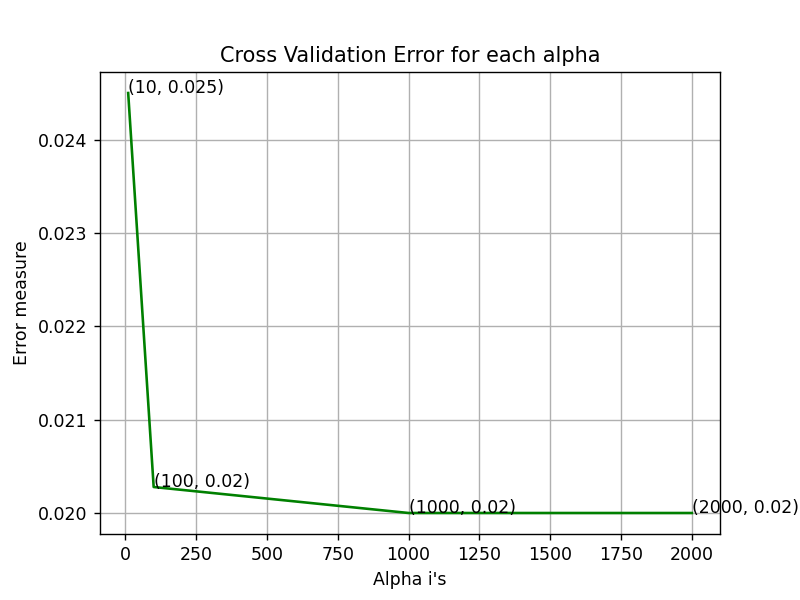

In [11]:
from tqdm import tqdm
alpha=[10,100,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(x_trn_final,y_trn_final)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(x_trn_final, y_trn_final)
    predict_y = sig_clf.predict_proba(x_cv_final)
    cv_log_error_array.append(log_loss(y_cv_final, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [12]:
x_cfl=XGBClassifier(n_estimators=2000,nthread=-1)
x_cfl.fit(x_trn_final,y_trn_final,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(x_trn_final, y_trn_final)

predict_y = sig_clf.predict_proba(x_trn_final)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_trn_final, predict_y))
predict_y = sig_clf.predict_proba(x_cv_final)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_final, predict_y))
predict_y = sig_clf.predict_proba(x_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_final, predict_y))

For values of best alpha =  2000 The train log loss is: 0.00806648019552203
For values of best alpha =  2000 The cross validation log loss is: 0.01518140695631339
For values of best alpha =  2000 The test log loss is: 0.018769937666862583


# Results

In [3]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ["Model",'Features','log loss']
ptable.add_row(["random","Byte files","2.45"])
ptable.add_row(["knn","Byte files","0.48"])
ptable.add_row(["Logistic Regression","Byte files","0.52"])
ptable.add_row(["Random Forest Classifier ","Byte files","0.06"])
ptable.add_row(["XgBoost Classification","Byte files","0.07"])
ptable.add_row(["\n","\n","\n"])
ptable.add_row(["knn","asmfiles","0.21"])
ptable.add_row(["Logistic Regression","asmfiles","0.38"])
ptable.add_row(["Random Forest Classifier ","asmfiles","0.03"])
ptable.add_row(["XgBoost Classification","asmfiles","0.04"])
ptable.add_row(["\n","\n","\n"])
ptable.add_row(["XgBoost Classification","Byte files(unigram+bigram)+asmfiles(unigram+pixels)","0.01"])
print(ptable)

+---------------------------+-----------------------------------------------------+----------+
|           Model           |                       Features                      | log loss |
+---------------------------+-----------------------------------------------------+----------+
|           random          |                      Byte files                     |   2.45   |
|            knn            |                      Byte files                     |   0.48   |
|    Logistic Regression    |                      Byte files                     |   0.52   |
| Random Forest Classifier  |                      Byte files                     |   0.06   |
|   XgBoost Classification  |                      Byte files                     |   0.07   |
|                           |                                                     |          |
|                           |                                                     |          |
|            knn            |                     

Procedure

Data visualization
Its a Multiclass Classification problem,
Metric is LOG-LOSS Log-Loss:- This metric is accurate and sensitive for each class label,which fits our buisness constraint.


Feature Extraction
We did the data analysis and found that,bow featuriztion for each file gives the accuracy we wanted and found the multivariate analysis with t-sne,that is was working.
// Note:Multivariate analysis with t-sne for .asm files,the features were not seperating but did the classification. //

Unique Feature
Taking the pixels of .asm files,by converting it into .png and taking the features.

Features
unigram of byte features
unigram of asm features
bi gram of byte features
Pixels(first 800) of .asm files
Modeling
First did one hot encoding of byte fearures and got the accuracy with different classification model:K-NN.LR,RF,XGBoost,similarly with .asm files.

In both the cases XGBClassifier was the winner.

Then did the XGBClassification on the test and train data (all combined) by doing hyperparameter tuning and then training and testing on the test and train data.

References
https://github.com/saicharanarishanapally/microsoft-malware-detection/blob/master/MicrosoftMalwareDetection.ipynb
https://github.com/dchad/malware-detection